In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

In [2]:
data_dir = 'data'
eval_dir = 'deepsea_eval'
split = 'test'
global_step = '8080006'

In [3]:
labels = np.load(os.path.join(data_dir, split + '.npy'))
predictions = np.load(os.path.join(eval_dir, '%s-predictions-%s.npy' % (split, global_step)))
assert(len(labels) == len(predictions))

In [4]:
def _progress(curr, end, message):
    sys.stdout.write('\r>> %s %.1f%%' % (message, float(curr) / float(end) * 100.0))
    sys.stdout.flush()

In [5]:
def plot_roc_curve(_labels, _predictions, indices, title):
    plt.figure(figsize=(6, 6))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.gca().set_aspect('equal')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    for i, idx in enumerate(indices):
        if np.sum(_labels[:, idx]) >= 50:
            fpr, tpr, _ = roc_curve(_labels[:, idx], _predictions[:, idx])
            plt.plot(fpr, tpr, color='black', lw=0.15)
        _progress(i + 1, len(indices), 'Computing ROC curves')
    print
    plt.show()

>> Computing ROC curves 100.0%


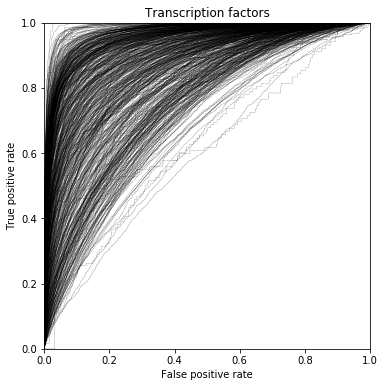

In [6]:
plot_roc_curve(labels, predictions, range(125, 125 + 690), 'Transcription factors')

>> Computing ROC curves 100.0%


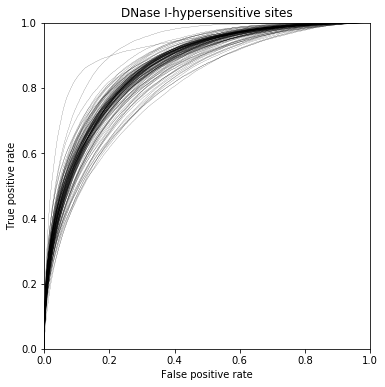

In [7]:
plot_roc_curve(labels, predictions, range(0, 125), 'DNase I-hypersensitive sites')

>> Computing ROC curves 100.0%


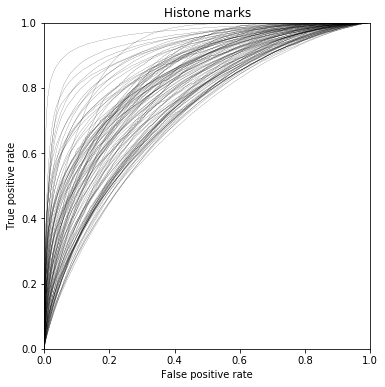

In [8]:
plot_roc_curve(labels, predictions, range(125 + 690, 125 + 690 + 104), 'Histone marks')